# Unsupervised Machine Learning

From the given Iris Data, predicting the optimum number of clusters.

In [254]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [255]:
dataset = pd.read_csv('Iris.csv')

In [256]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [257]:
#Columns in dataset
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [258]:
#Dataset Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [259]:
#Species
n=dataset['Species'].nunique()
arr=dataset['Species'].unique()
print(n)
print(arr)

3
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [260]:
#Stats
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


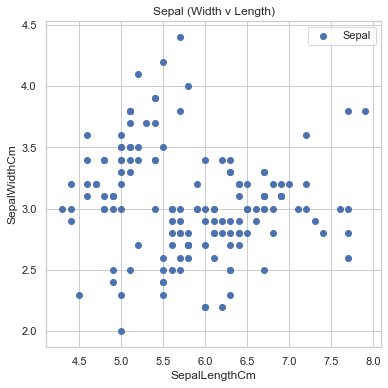

In [261]:
#Sepal
plt.figure(figsize=(6, 6))
plt.scatter(dataset['SepalLengthCm'],dataset['SepalWidthCm'],label='Sepal')
plt.title('Sepal (Width v Length)')
plt.ylabel('SepalWidthCm')
plt.xlabel('SepalLengthCm')
plt.legend()

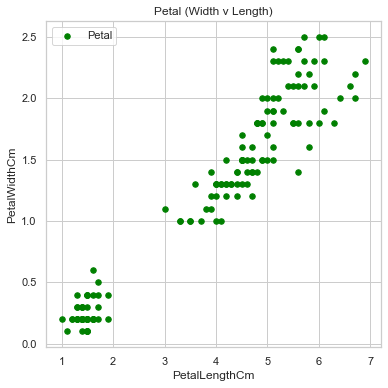

In [262]:
#Petal
plt.figure(figsize=(6, 6))
plt.scatter(dataset['PetalLengthCm'],dataset['PetalWidthCm'],
            s=30,label='Petal',c='green')
plt.title('Petal (Width v Length)')
plt.ylabel('PetalWidthCm')
plt.xlabel('PetalLengthCm')
plt.legend()

Species distribution


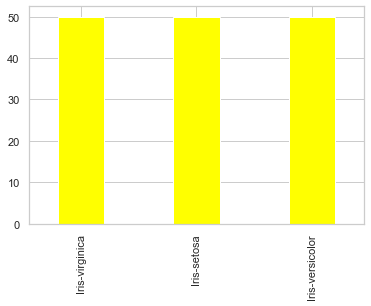

In [263]:
#Species
print('Species distribution')
dataset['Species'].value_counts().plot(kind='bar', color='yellow', width=0.4)

All 3 Species occur equal number of times in the dataset.

## K Means

In [264]:
x=dataset.iloc[:,[1,2,3,4]].values

from sklearn.cluster import KMeans

#Within cluster sum square WCSS
wcss=[] 
for i in range(1,11):
    kmeans=KMeans(n_clusters = i,init='k-means++',
                  max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

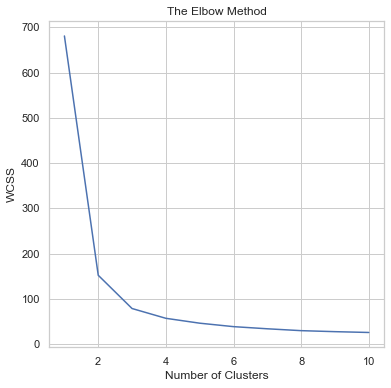

In [265]:
#Plotting the wcss vs # of clusters graph 
#The Elbow Method
plt.figure(figsize=(6, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters is at the elbow to the curve. WCSS constantly decreasing with number of clusters increasing. WCSS =0 when No. of clusters is equal to points in dataset.
###### So, optimal No. of cluster = 3.

In [266]:
#Creating KMean Classifier with no. of cluster = 3
kmeans=KMeans(n_clusters =3 , init ='k-means++',
             max_iter =300,n_init =10, random_state =0)
#fitting the classifier into dataset
y_kmeans=kmeans.fit_predict(x)

### Visualizing the Clusters 
##### On Sepal Data

<Figure size 432x432 with 0 Axes>

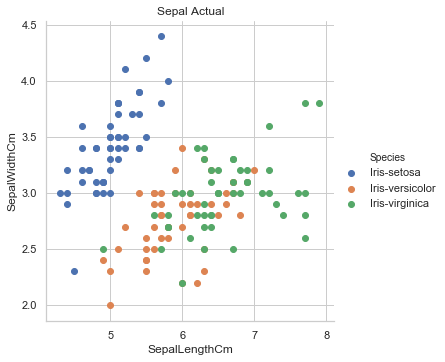

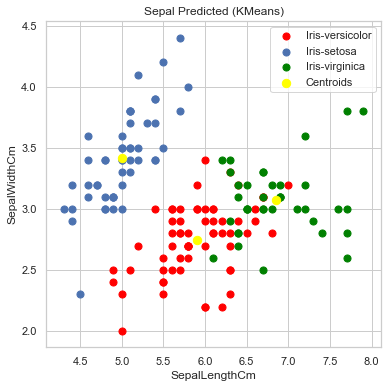

In [269]:
#ACTUAL
plt.figure(figsize=(6, 6))
sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue='Species', size=5)\
    .map(plt.scatter, 'SepalLengthCm','SepalWidthCm' )\
    .add_legend();
plt.title('Sepal Actual')
plt.show()


#PREDICTED
plt.figure(figsize=(6, 6))
plt.scatter(x[y_kmeans == 0,0] , x[y_kmeans == 0, 1],
           s=50, c= 'red' , label='Iris-versicolor')
plt.scatter(x[y_kmeans == 1,0] , x[y_kmeans == 1, 1],
           s=50 , label='Iris-setosa')
plt.scatter(x[y_kmeans == 2,0] , x[y_kmeans == 2, 1],
           s=50, c= 'green' , label='Iris-virginica')

#plotting centroid
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=70, c='yellow', label='Centroids')

plt.title('Sepal Predicted (KMeans)')
plt.ylabel('SepalWidthCm')
plt.xlabel('SepalLengthCm')
plt.legend()
plt.show()

### Visualizing the Clusters 
##### On Petal Data

<Figure size 432x432 with 0 Axes>

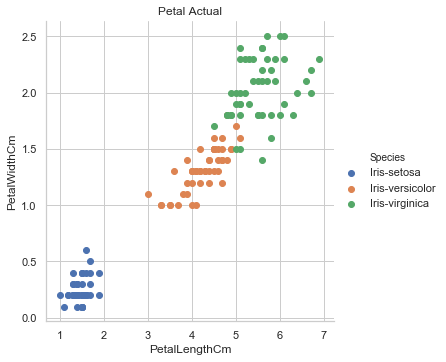

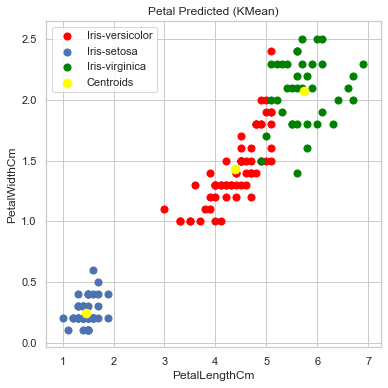

In [268]:
#ACTUAL
plt.figure(figsize=(6, 6))
sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue='Species', size=5)\
    .map(plt.scatter, 'PetalLengthCm','PetalWidthCm' )\
    .add_legend();
plt.title('Petal Actual')
plt.show()


#PREDICTED
plt.figure(figsize=(6, 6))
plt.scatter(x[y_kmeans == 0,2] , x[y_kmeans == 0, 3],
           s=50, c= 'red' , label='Iris-versicolor')
plt.scatter(x[y_kmeans == 1,2] , x[y_kmeans == 1, 3],
           s=50 , label='Iris-setosa')
plt.scatter(x[y_kmeans == 2,2] , x[y_kmeans == 2, 3],
           s=50, c= 'green' , label='Iris-virginica')

#plotting centroid
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], 
            s=75, c='yellow', label='Centroids')

plt.title('Petal Predicted (KMean)')
plt.ylabel('PetalWidthCm')
plt.xlabel('PetalLengthCm')
plt.legend()
plt.show()